### Import libraries

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.calibration import CalibratedClassifierCV

### Import data and filter only on the needed features an labels

In [125]:
dataset = pd.read_csv('Consumer_Complaints.csv')
col = ['Product', 'Consumer Complaint']
dataset= dataset[col]

# Import data and drop rows with missing labels
dataset.dropna(subset=["Consumer Complaint"], inplace=True)
dataset.columns=['Product', 'ConsumerComplaint'] # Rename column
dataset['category_id'] = dataset['Product'].factorize()[0]

# print top 5 rows
dataset.head(5)
dataset=dataset[dataset['Product'].isin(['Credit reporting', 'Debt collection', 'Mortgage', 'Credit Card','Student loan','Bank account or service'])]
dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].map(lambda x: x.replace('XX',''))
dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].str.replace('\d+', '')
dataset.head()

,Product,ConsumerComplaint,category_id
1,Credit reporting,I have outdated information on my credit repor...,0
7,Credit reporting,An account on my credit report has a mistaken ...,0
12,Debt collection,This company refuses to provide me verificatio...,2
16,Debt collection,This complaint is in regards to Square Two Fin...,2
25,Mortgage,Started the refinance of home mortgage process...,3


In [126]:
# Convert to lowercase
dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].str.lower()
dataset.head()

,Product,ConsumerComplaint,category_id
1,Credit reporting,i have outdated information on my credit repor...,0
7,Credit reporting,an account on my credit report has a mistaken ...,0
12,Debt collection,this company refuses to provide me verificatio...,2
16,Debt collection,this complaint is in regards to square two fin...,2
25,Mortgage,started the refinance of home mortgage process...,3


In [127]:
# Remove stop words
stopwords = [ "________________________________________from", "________________", "____", "00", "xxxx", "xx", "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

for word in stopwords :
    dataset['ConsumerComplaint'] = dataset['ConsumerComplaint'].replace(to_replace=r'\b%s\b'%word, value="",regex=True)
    
dataset.head()

,Product,ConsumerComplaint,category_id
1,Credit reporting,outdated information credit report prev...,0
7,Credit reporting,account credit report mistaken date. mai...,0
12,Debt collection,company refuses provide verification valid...,2
16,Debt collection,complaint regards square two financial. re...,2
25,Mortgage,started refinance home mortgage process cas...,3


### Plot the data

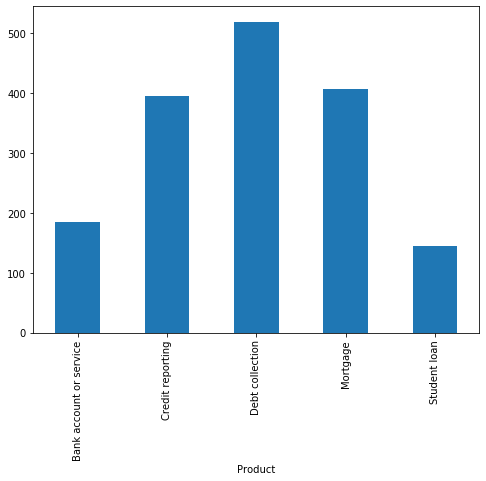

In [128]:
# Plot the data

import matplotlib.pyplot as plt
fig = plt.figure(figsize= (8,6))
dataset.groupby('Product').ConsumerComplaint.count().plot.bar(ylim=0)


### Split the data into training and test sets

In [129]:
# Split into X/y
x = dataset["ConsumerComplaint"]
y = dataset["category_id"]

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=4)

### Convert text features to numeric

In [130]:
#cv = CountVectorizer()  # CountVectorizer is an alternative method (normally Tfid is better)
cv2 = TfidfVectorizer(sublinear_tf= True, min_df = 1, stop_words='english')

X_traincv = cv2.fit_transform(x_train)
print(X_traincv.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [131]:
# Build machine learning model

#model = RandomForestClassifier(random_state = 42)
#model = MultinomialNB()
#model = LinearSVC()
svm = LinearSVC()
model = CalibratedClassifierCV(svm) 
model.fit(X_traincv, y_train)
#y_proba = clf.predict_proba(X_test)
#model.fit(X_traincv, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [132]:
x_testcv = cv2.transform(x_test)
x_testcv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [133]:
model.predict(x_testcv)

array([3, 0, 7, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 3, 7, 6, 2, 6, 0, 6, 0, 0,
       3, 2, 3, 6, 3, 7, 6, 0, 2, 6, 2, 6, 7, 3, 2, 2, 3, 0, 2, 7, 0, 2,
       2, 3, 3, 0, 3, 0, 0, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 0, 2, 0, 3, 2,
       2, 3, 7, 0, 0, 3, 2, 2, 2, 2, 3, 2, 2, 3, 2, 0, 3, 3, 2, 3, 2, 3,
       2, 6, 6, 6, 0, 7, 7, 3, 2, 2, 2, 2, 6, 3, 3, 0, 7, 3, 2, 2, 2, 3,
       6, 2, 0, 0, 7, 2, 2, 3, 0, 2, 3, 3, 7, 2, 2, 3, 2, 2, 3, 0, 2, 3,
       3, 2, 6, 2, 2, 0, 3, 0, 3, 2, 3, 7, 2, 2, 3, 2, 2, 0, 6, 2, 2, 3,
       3, 7, 2, 3, 0, 2, 6, 3, 6, 0, 0, 0], dtype=int64)

In [134]:
model.score(x_testcv, y_test)

0.9036144578313253

In [135]:
dataset.head(10)

,Product,ConsumerComplaint,category_id
1,Credit reporting,outdated information credit report prev...,0
7,Credit reporting,account credit report mistaken date. mai...,0
12,Debt collection,company refuses provide verification valid...,2
16,Debt collection,complaint regards square two financial. re...,2
25,Mortgage,started refinance home mortgage process cas...,3
26,Mortgage,", ex-husband applied refinance & heloc ...",3
28,Credit reporting,disputed several accounts credit report e...,0
29,Mortgage,mortgage transferred nationstar //. since ...,3
49,Debt collection,writing request assistance looking dece...,2
61,Credit reporting,disputing inaccurate information chex-syst...,0


### Evaluation metrics

In [136]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels
    on a classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [137]:
predicted = model.predict(x_testcv)
evaluate_preds(y_test, predicted)

Acc: 90.36%
Precision: 0.90
Recall: 0.90
F1 score: 0.90


{'accuracy': 0.9, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}

In [138]:
uniques = dataset.drop('ConsumerComplaint', axis=1)
unique_labels = uniques.drop_duplicates()
unique_labels

,Product,category_id
1,Credit reporting,0
12,Debt collection,2
25,Mortgage,3
124,Bank account or service,6
152,Student loan,7


In [139]:
inputStr = cv2.transform(["I need to finance my student loan please"])
results = model.predict(inputStr )
acc = model.predict_proba(inputStr)
print(f'Product category id: {results[0]}')
print(f'Product Name: { np.asarray(unique_labels[unique_labels.category_id.eq(results[0])])[0][0] }')
print(f'Accuracy score: { acc.max() * 100}')

Product category id: 7
Product Name: Student loan
Accuracy score: 89.65253679704989


* ***Accuracy*** is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* ***Precision*** and ***recall*** become more important when classes are imbalanced.
If false positive predictions are worse than false negatives, aim for higher precision.
If false negative predictions are worse than false positives, aim for higher recall.
* ***F1-score*** is a combination of precision and recall.

In [140]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        36
           2       0.90      0.93      0.92        59
           3       0.86      0.97      0.92        39
           6       0.94      0.88      0.91        17
           7       0.92      0.80      0.86        15

    accuracy                           0.90       166
   macro avg       0.91      0.88      0.90       166
weighted avg       0.91      0.90      0.90       166



In [141]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            predicted,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,2,3,6,7
Actual Labels,,,,,
0,30,3,3,0,0
2,1,55,1,1,1
3,0,1,38,0,0
6,0,0,2,15,0
7,1,2,0,0,12


### Hypertuning with GridSearchCV - Example

In [142]:
# Create the parameter grid based on the results of random search 
"""
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
model = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = 1, verbose = 2)
grid_search.fit(X_traincv, y_train)
grid_search.best_params_
"""

"\nparam_grid = {\n    'bootstrap': [True],\n    'max_depth': [80, 90, 100, 110],\n    'max_features': [2, 3],\n    'min_samples_leaf': [3, 4, 5],\n    'min_samples_split': [8, 10, 12],\n    'n_estimators': [100, 200, 300, 1000]\n}\n\n# Create a based model\nmodel = RandomForestClassifier()\n# Instantiate the grid search model\ngrid_search = GridSearchCV(estimator = model, param_grid = param_grid, \n                          cv = 3, n_jobs = 1, verbose = 2)\ngrid_search.fit(X_traincv, y_train)\ngrid_search.best_params_\n"